<a href="https://colab.research.google.com/github/superbunny38/2021MachineLearning/blob/main/CS229MachineLearning/assignments/ProblemSet1(c).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$h_\theta(x) = g(\theta^{T}x)$

$g(z) = \frac{1}{1+e^{-z}}$

Hessian Matrix of Cost function $J(\theta)$

$H_{j,k} = \frac{\vartheta^2}{\vartheta\theta_j\vartheta\theta_k}J(\theta)$
= $\frac{1}{m} ∑_{i=1}^{m}h_{\theta}(y^ix^i)(1-h_{\theta}(y^ix^i))x^i_jx^i_k$

notation

$x^{(i)}_j$
i: datasample, j: feature

# B.Implement Newtons method for optimizing J(θ), and apply it to fit a logistic regression model to the data.

### visualize data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tmp_logistic_x = pd.read_csv("logistic_x.txt",header=None,delimiter=r"\s+")
logistic_y = pd.read_csv("logistic_y.txt",header=None,delimiter=r"\s+")

In [3]:
logistic_x = []
for x0,x1 in zip(tmp_logistic_x[0],tmp_logistic_x[1]):
  logistic_x.append([x0,x1])

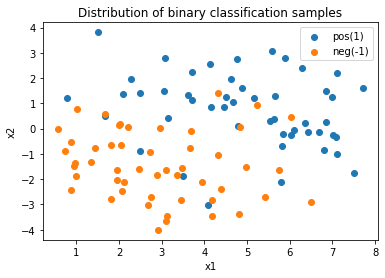

In [5]:
logistic_y = np.array(logistic_y)
logistic_y = list(logistic_y)
x_pos = []
x_neg = []
for i in range(len(logistic_y)):
  if logistic_y[i] == 1.:
    x_pos.append(logistic_x[i])
  else:
    x_neg.append(logistic_x[i])
pos_x_ = []
pos_y_ = []
for x, y in x_pos:
  pos_x_.append(x)
  pos_y_.append(y)
pos_df = pd.DataFrame({"x0":pos_x_,"x1":pos_y_})
x_ = []
y_ = []
for x, y in x_neg:
  x_.append(x)
  y_.append(y)
neg_df = pd.DataFrame({"x0":x_,"x1":y_})
import matplotlib.pyplot as plt
plt.title("Distribution of binary classification samples")
plt.scatter(pos_df["x0"],pos_df["x1"],label = "pos(1)")
plt.scatter(neg_df["x0"],neg_df["x1"],label="neg(-1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### prepare data to fit the model

In [6]:
df_x = pd.read_csv("logistic_x.txt", sep="\ +", names=["x1","x2"], header=None, engine='python')
df_y = pd.read_csv('logistic_y.txt', sep='\ +', names=["y"], header=None, engine='python')
df_y = df_y.astype(int)
df_x.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [7]:
x = np.hstack([np.ones((df_x.shape[0], 1)), df_x[["x1","x2"]].values])
x[:3]#x0,x1,x2

array([[ 1.        ,  1.3432504 , -1.3311479 ],
       [ 1.        ,  1.8205529 , -0.6346681 ],
       [ 1.        ,  0.98632067, -1.8885762 ]])

In [8]:
y = df_y["y"].values
y[:3]

array([-1, -1, -1])

Sigmoid function $g(z)$

In [9]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

$h_{\theta}(x) = g(\theta^Tx)$

In [10]:
def hypothesis(x,theta):
  return np.dot(x,theta)

dot product

In [11]:
x1 = [1,2,3]
y1 = [1,2,3]
np.dot(x1,y1)

14

Initialize $\theta$

In [12]:
initial_theta = np.zeros((x.shape[1],1))
initial_theta.shape

(3, 1)

In [13]:
initial_theta

array([[0.],
       [0.],
       [0.]])

$\nabla_{\theta}J(\theta)$

$\frac{d}{d\theta_j}J(\theta)=-\frac{1}{m}\sum_{i=1}^m(1-h_{\theta}(y^ix^i))y^ix^i_j$

In [14]:
def gradient(theta,x,y):
  z = y*hypothesis(x,theta)
  h = sigmoid(z)
  g = -np.mean((1-h)*y*x.T, axis = 1)
  return g

 #### Hessian Matrix (H)
n = # of columns in input data(number of features + 1)

i : datasample

H in  $\mathbb{R}^{(n+1)(n+1)}$

 $\frac{1}{m} ∑_{i=1}^{m}h_{\theta}(y^ix^i)(1-h_{\theta}(y^ix^i))x^i_jx^i_k$

In [15]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [16]:
x.shape

(99, 3)

In [17]:
def hessian(theta, x, y):
  hess = np.zeros((x.shape[1], x.shape[1]))#n+1 dimension
  z = y*hypothesis(x,theta)
  h = sigmoid(z)
  #2nd dimensional array
  for i in range(hess.shape[0]):#accessing data samples(1~m(:99))
    for j in range(hess.shape[0]):
      if i <= j:
        #fill hessian matrix
        hess[i][j] = np.mean(h*(1-h)*x[:,i]*x[:,j])
        if i != j:
          hess[j][i] = hess[i][j]#symmetric matrix
  #print("hessian shape:",hess.shape)
  return hess

### Newton's method

$\theta := \theta- H^{-1}\nabla_{\theta}J(\theta)$

delta intialize 어떻게 하는거지?

In [18]:
def newton(initial_theta, x,y, eps):
  theta = initial_theta#intialize theta by 0
  delta = 1#goal = 0
  while delta > eps:#goal: to reduce delta
    theta_prev = theta.copy()#create a new copy of theta(different from =)
    result_h = hessian(theta,x,y)
    
    gr = gradient(theta,x,y)
    
    theta -= np.linalg.inv(result_h).dot(gr)#np.linalg.inv: inverse matrix
    
    delta = np.linalg.norm(theta-theta_prev, ord = 1)#find distance(delta)
  return theta, delta

## Run Newton's method to perform logistic regression

In [19]:
# Initialize theta0
theta0 = np.zeros((x.shape[1]))
theta0.shape

(3,)

In [20]:
theta_final, delta = newton(theta0, x,y,1e-6)#eps:le-6

In [21]:
print("final theta: {}".format(theta_final))

final theta: [-2.6205116   0.76037154  1.17194674]


In [22]:
delta

4.146349930067572e-12

In [23]:
print("weights: ",theta_final)

weights:  [-2.6205116   0.76037154  1.17194674]


# C.
Plot the training data (your axes should be x1 and x2, corresponding to the two
coordinates of the inputs, and you should use a different symbol for each point plotted to
indicate whether that example had label 1 or -1). Also plot on the same figure the decision
boundary fit by logistic regression. (This should be a straight line showing the boundary
separating the region where hθ(x) > 0.5 from where hθ(x) ≤ 0.5.)

In [24]:
b = theta_final[0]
w1 = theta_final[1]
w2 = theta_final[2]
c = -b/w2
m = -w1/w2

In [25]:
xmin, xmax = -0.5, 10
xd = np.array([xmin, xmax])
yd = m*xd + c

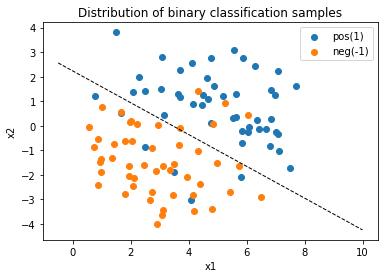

In [37]:
logistic_y = np.array(logistic_y)
logistic_y = list(logistic_y)
x_pos = []
x_neg = []
for i in range(len(logistic_y)):
  if logistic_y[i] == 1.:
    x_pos.append(logistic_x[i])
  else:
    x_neg.append(logistic_x[i])
pos_x_ = []
pos_y_ = []
for x, y in x_pos:
  pos_x_.append(x)
  pos_y_.append(y)
pos_df = pd.DataFrame({"x0":pos_x_,"x1":pos_y_})
x_ = []
y_ = []
for x, y in x_neg:
  x_.append(x)
  y_.append(y)
neg_df = pd.DataFrame({"x0":x_,"x1":y_})
import matplotlib.pyplot as plt
plt.title("Distribution of binary classification samples")
plt.scatter(pos_df["x0"],pos_df["x1"],label = "pos(1)")
plt.scatter(neg_df["x0"],neg_df["x1"],label="neg(-1)")
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [39]:
hyp_pos_x1 = []
hyp_pos_x2 = []
hyp_neg_x1 = []
hyp_neg_x2 = []
correct = 0
error = 0
for x1,x2,answer in zip(df_x["x1"],df_x["x2"],df_y["y"]):
  z = theta_final[0]+x1*theta_final[1]+x2*theta_final[2]
  hyp = sigmoid(z)
  #print("hypothesis:",hyp,"answer:",answer)
  if hyp>0.5:
    final_hyp = 1
    hyp_pos_x1.append(x1)
    hyp_pos_x2.append(x2)
  else:
    final_hyp = -1
    hyp_neg_x1.append(x1)
    hyp_neg_x2.append(x2)
  if final_hyp != answer:
    error+=1
  else:
    correct+=1
print("number of errors: {} accuracy: {:.2f}".format(error, correct/(error+correct)))

number of errors: 11 accuracy: 0.89


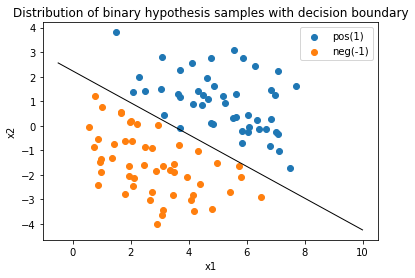

In [41]:
hyp_pos = pd.DataFrame({"x1":hyp_pos_x1, "x2":hyp_pos_x2})
hyp_neg = pd.DataFrame({"x1":hyp_neg_x1, "x2":hyp_neg_x2})
plt.title("Distribution of binary hypothesis samples with decision boundary")
plt.plot(xd, yd, 'k', lw=1, ls='-')
plt.scatter(hyp_pos["x1"],hyp_pos["x2"],label = "pos(1)")
plt.scatter(hyp_neg["x1"],hyp_neg["x2"],label="neg(-1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

## See if scikit-learn's regression returns the same result.

### Step 1: Importing all the required libraries

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
df_x = pd.read_csv("logistic_x.txt", sep="\ +", names=["x1","x2"], header=None, engine='python')
df_y = pd.read_csv('logistic_y.txt', sep='\ +', names=["y"], header=None, engine='python')
df_y = df_y.astype(int)

In [44]:
sk_y = df_y["y"].values
sk_x = df_x[["x1","x2"]].values

In [58]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(sk_x, sk_y, test_size = 0.05)

In [59]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.2584948487824087


In [60]:
regr.coef_

array([0.20813909, 0.31198857])

In [61]:
regr.intercept_

-0.7430348265852706

count error and accuracy

In [62]:
hyp_pos_x1 = []
hyp_pos_x2 = []
hyp_neg_x1 = []
hyp_neg_x2 = []
correct = 0
error = 0

for x1,x2,answer in zip(df_x["x1"],df_x["x2"],df_y["y"]):
  z = regr.intercept_+x1*regr.coef_[0]+x2*regr.coef_[1]
  hyp = sigmoid(z)
  #print("hypothesis:",hyp,"answer:",answer)
  if hyp>0.5:
    final_hyp = 1
    hyp_pos_x1.append(x1)
    hyp_pos_x2.append(x2)
  else:
    final_hyp = -1
    hyp_neg_x1.append(x1)
    hyp_neg_x2.append(x2)
  if final_hyp != answer:
    error+=1
  else:
    correct+=1
print("number of errors: {} accuracy: {:.2f}".format(error, correct/(error+correct)))

number of errors: 10 accuracy: 0.90


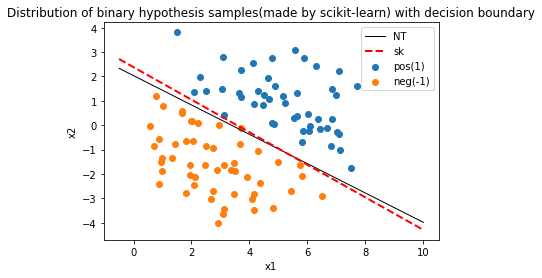

In [72]:
hyp_pos = pd.DataFrame({"x1":hyp_pos_x1, "x2":hyp_pos_x2})
hyp_neg = pd.DataFrame({"x1":hyp_neg_x1, "x2":hyp_neg_x2})
plt.title("Distribution of binary hypothesis samples(made by scikit-learn) with decision boundary")
plt.plot(xd, yd, 'k', lw=1, ls='-', label = "NT")#newton's method decision boundary
plt.plot(xd, yd1, 'k', lw=2, ls='--', color = "red", label = "sk")#scikit-learn's decision boundary
plt.scatter(hyp_pos["x1"],hyp_pos["x2"],label = "pos(1)")
plt.scatter(hyp_neg["x1"],hyp_neg["x2"],label="neg(-1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### comparison on the original dataset

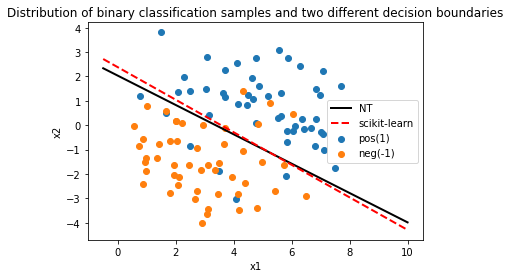

In [75]:
logistic_y = np.array(logistic_y)
logistic_y = list(logistic_y)
x_pos = []
x_neg = []
for i in range(len(logistic_y)):
  if logistic_y[i] == 1.:
    x_pos.append(logistic_x[i])
  else:
    x_neg.append(logistic_x[i])
pos_x_ = []
pos_y_ = []
for x, y in x_pos:
  pos_x_.append(x)
  pos_y_.append(y)
pos_df = pd.DataFrame({"x0":pos_x_,"x1":pos_y_})
x_ = []
y_ = []
for x, y in x_neg:
  x_.append(x)
  y_.append(y)
neg_df = pd.DataFrame({"x0":x_,"x1":y_})
import matplotlib.pyplot as plt
plt.title("Distribution of binary classification samples and two different decision boundaries")
plt.scatter(pos_df["x0"],pos_df["x1"],label = "pos(1)")
plt.scatter(neg_df["x0"],neg_df["x1"],label="neg(-1)")
plt.plot(xd, yd, 'k', lw=2, ls='-', label = "NT")#newton's method decision boundary
plt.plot(xd, yd1, 'k', lw=2, ls='--', color = "red", label = "scikit-learn")#scikit-learn's decision boundary
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()